In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use(r'U:\DNA-PAINT-SPT\nature_7pt.mplstyle')

# Load data  [same data.hdf as Fig13]
data = pd.read_hdf(r'U:\DNA-PAINT-SPT\SI\Fig12\data.hdf')

Text(0.5, 0, 't [min]')

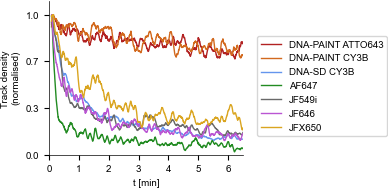

In [4]:
# Plot
f, ax = plt.subplots(1, 1)
f.set_figheight(2)
f.set_figwidth(2.5)
rolling = 60

colors = iter(['firebrick', 'chocolate', 'cornflowerblue',
              'forestgreen', 'dimgrey', 'mediumorchid', 'goldenrod'])

for condition in data.condition.unique():
    data_expl = data.loc[data.condition == condition].explode(['nTracks', 'frame']).fillna(0)
    df_C_grouped_median = data_expl.groupby(by='frame')['nTracks'].median()
    normalizer = np.max(df_C_grouped_median.rolling(rolling).mean())
    ax.plot(df_C_grouped_median.index, df_C_grouped_median.rolling(
        rolling).mean()/normalizer, '-', label=f'{condition}', color=next(colors))
    ax.legend(bbox_to_anchor=(1.05, 0.8))

# Decorate Plot
ax.set_ylabel('Track density \n(normalised)')
ax.set_xlim(0, 4875)
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(0, 5000, step=750))
ax.set_yticks(np.arange(0, 1.01, step=0.33333))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y/750:.0f}'))
ax.set_xlabel('t [min]')